# Workshop 6: Monte Carlo techniques

## Preview: generating random numbers

We have already discussed random numbers in Week 5. The first step in similating nature -- which, despite Einstein's objections, is playing dice after all -- is to learn how to generate some numbers that appear random. Of course, computers cannot generate true random numbers -- they have to follow an algorithm. But the algorithm may be based on something that is difficult to predict (e.g. the time of day you are executing this code) and therefore *look* random to a human. Sequences of such numbers are called *pseudo-random*. 

The random variables you generate will be distributed according to some *Probability Density Function* (PDF). The most common PDF is *flat*: $f(x)=\frac{1}{b-a}$ for $x\in [a..b]$. Here is how to get a random number uniformly distributed between $a=0$ and $b=1$ in Python:

In [2]:
# standard preamble
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# generate one random number between [0,1)
x = np.random.rand()
print 'x=',x

# generate an array of 10 random numbers between [0,1)
array = np.random.rand(10)
print array

x= 0.3971345108
[ 0.31787188  0.5274782   0.41442429  0.22965637  0.41651156  0.92173707
  0.04219157  0.00447381  0.3713746   0.61803248]


You can generate a set of randomly-distributed integer values instead:

In [3]:
a = np.random.randint(0,1000,10)  
print a

[656 306 611 626 579 762 341 528 754 138]


Choose a random element from a set:

In [4]:
print np.random.choice(['a','b','c','d','e','f','g','h','i','j'])  

b


## Linear Congruent Generator

It is instructive at this point how a random number generator may be constructed. We discussed Linear Congruent Generator in lecture. Here is a simple piece of code implementing such a generator:

In [30]:
myRandomSeed = 123
def myRandom(a=65539, b=0, c=int(2**31-1)):
    global myRandomSeed
    x = (a*myRandomSeed+b) % c
    myRandomSeed = x
    return x

print myRandom()



8061297


You can use it in two steps:
1. Set a seed *myRandom*
1. Call *myRandom()*: either with default parameters, or by setting parameters *a*, *b*, and *c* explicitly:

In [31]:
out = ""
for i in range(5):
    out += str(myRandom())
    out += " "
    
print '5 random integers with default parameters:', out
    
out = ""
myRandomSeed = 1
for i in range(20):
    out += str(myRandom(a=5, b=3, c=8))
    out += " "

print '20 random integers with explicit parameters, pattern repeats:',out

5 random integers with default parameters: 48366921 233772447 1064066235 453022987 1712125218 
20 random integers with explicit parameters, pattern repeats: 0 3 2 5 4 7 6 1 0 3 2 5 4 7 6 1 0 3 2 5 


As you can see from the example above, the choice of parameters affects how quickly the pattern of pseudo-random numbers repeats. The parameters also determine how *random* the sequence appears to be

## Exercise 1

Analyze how random the sequence is:
1. Write a piece of code to determine the period of a random number sequence. You code should abort if the sequence is too long and return a lower limit on the period.
1. Test you code with *myRandom()* and two sets of parameters above: the default and *a=5, b=3, c=8*
1. Test your code with *numpy.random.randint*
1. Plot a histogram of random numbers returned by *numpy.random.rand()*. Compute mean and standard deviation of this distribution. Does it look like what you expect from the uniform distribution ? 
1. Make a scatter plot of pairs of sequentual random numbers returned by *numpy.random.rand()*. Does it look like what you expect from the uniform distribution ? 

20 random integers with explicit parameters, pattern repeats: [2, 5, 4, 7, 6, 1, 0, 3, 2, 5, 4, 7, 6, 1, 0, 3, 2, 5, 4, 7]
Mean 1.0029516189
Standard Deviation 3.38635441563


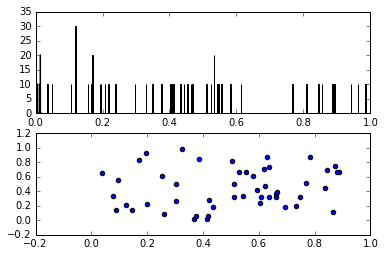

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
%matplotlib inline

myRandomSeed = 123
def myRandom(a=5, b=3, c=8):
    global myRandomSeed
    x = (a*myRandomSeed+b) % c
    myRandomSeed = x
    return x


def period_finder(a):
    count = 0
    for x in a:
        if a[0]==a[x]:
            return count
        count += 1
        
        
        
def create_seq():
    out = []
    myRandomSeed = 1
    for i in range(20):
        out.append(myRandom(a=5, b=3, c=8))
    return out 

print '20 random integers with explicit parameters, pattern repeats:', create_seq()


plt.subplot(2,1,1)
n, bins, patches = plt.hist(np.random.rand(5,10), 50 ,normed=True)
print 'Mean', sp.mean(n)
print 'Standard Deviation', sp.std(n)
plt.subplot(2,1,2)
plt.scatter(np.random.rand(5,10), np.random.rand(5,10))


plt.show()

## Example: Python random number generators


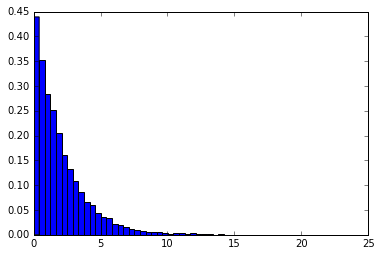

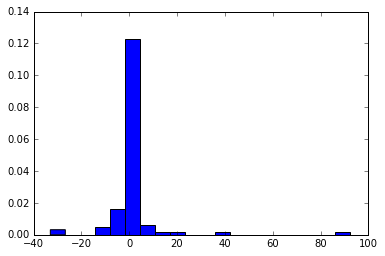

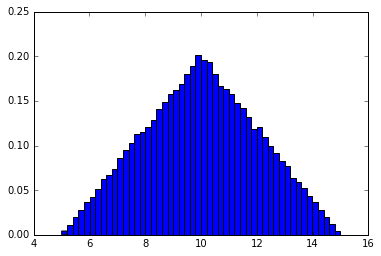

In [12]:
# Exponential
plt.hist(np.random.exponential(scale=2,size=10000),50,normed=True)
plt.show()

# Cauchy
plt.hist(np.random.standard_cauchy(size=100),20,normed=True)
plt.show()

# Triangular
plt.hist(np.random.triangular(5,10,15,size=100000),50,normed=True)
plt.show()

## Exercise 2

1. Compute mean and standard deviation of a 10,000 event sample generated according to
    1. Exponential distribution
    1. Cauchy distribution
Do the results make sense ? 
1. Generate 100,000 pairs of uniformly-distributed random numbers $x\in[0..1]$ and $y\in[0..1]$. Make a histogram of the distribution of $x+y$ and $x-y$. Do they look like what you would expect ? 

## Exercise 3: Generating an arbitrary distribution

1. Starting from a uniform random number distribution (*numpy.random.rand()*), generate 10,000 gaussian-distributed random numbers using inverse transform method:
    1. Generate a pair of uniform-distributed numbers $u_1\in[0..1]$ and $u_2\in[0..1]$
    1. Compute $z_1=\sin(2\pi u_1)\sqrt{-2\ln u_2}$ and $z_2=\cos(2\pi u_1)\sqrt{-2\ln u_2}$
1. Make a histogram of $z_1$ and $z_2$
1. Make a scatter plot of $z_2$ vs $z_1$. 
1. Do the results follow your expectations ? 

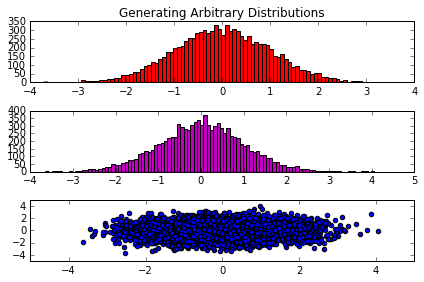

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
%matplotlib inline

a = 0
b = 1

#rand = np.random.rand() 
rand = np.random.standard_normal(size = 10000)
u1 = np.random.uniform(low = a,high = b, size =10000)
u2 = np.random.uniform(low = a, high = b, size =10000)

z1 = np.sin(2*(np.pi)*u1)*np.sqrt(-2*np.log(u2))
z2 = np.cos(2*np.pi*u1) *np.sqrt(-2*np.log(u2))

plt.subplot(3,1,1)
plt.title('Generating Arbitrary Distributions')
n, bins, patches = plt.hist(z1, 100, color = 'r')
plt.subplot(3,1,2)
b, bins, patches = plt.hist(z2, 100, color = 'm')
plt.subplot(3,1, 3)
plt.scatter(z2, z1)
plt.tight_layout()
plt.show()



## Exercise 4: Integration by accept-reject Monte Carlo method

Compute the value of $\pi$ using Monte Carlo method. 
1. Implement the Monte Carlo accept-reject method for computing $\pi$
1. For a given number of events $N$ you use in the calculation, compute
    1. The estimate of $\pi$
    1. The estimated precision of the value $\pi$
1. Plot the difference between estimated and true value of $\pi$ as a function of the number of events $N$ and compare that difference to the uncertainty you estimated

3.32
3.14192


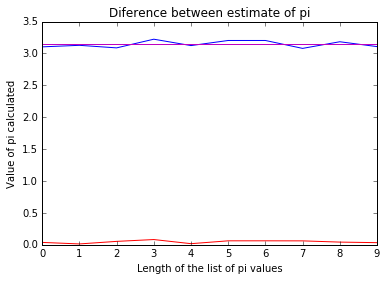

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import math
import random
from __future__ import division
%matplotlib inline

random.seed()

def calculatepi(N):
    throws = 0
    hits = 0  # initialize hits with 0

    for i in range(0,N):
        x = np.random.random()
        y = np.random.random()
        throws = throws + 1

        if(x*x + y*y <=1):
            hits = hits+1
    
    return 4* (hits/throws)

print calculatepi(100)
print calculatepi(100000)


pilistE = []
pilistA = []
difList = []
    
for x in range(0, 10):
    pilistE.append(calculatepi(1000))
    pilistA.append(np.pi)
    difList.append(abs(np.pi-pilistE[x]))

plt.title('Diference between estimate of pi')
xr = range(0,len(pilistA)) 
plt.plot( xr,difList, 'r')
plt.plot(xr, pilistE, 'b')
plt.plot(xr, pilistA, 'm')
plt.ylabel('Value of pi calculated')
plt.xlabel('Length of the list of pi values')
plt.show()
